In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_distribution
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Dirac Notations:

All quantum states are represented as superpositions of the states $\ket{0}$ and $\ket{1}$, as $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$. where $\alpha,\beta\in\mathbb{C}$. Since the state is normalized, we have $|\alpha|^2+|\beta|^2=1$. The state $\ket{0}$ is called the ground state and $\ket{1}$ is called the excited state. The state $\ket{\psi}$ is called a qubit. 

The state $\ket{0}$ is represented as $\begin{bmatrix}1\\0\end{bmatrix}$ and the state $\ket{1}$ is represented as $\begin{bmatrix}0\\1\end{bmatrix}$. The state $\ket{\psi}$ is represented as $\begin{bmatrix}\alpha\\\beta\end{bmatrix}$.

# The Pauli-X Gate: 

Some gates produce visual and/or mathematical results. An example is the Pauli-X gate or simply the X-Gate, which is the quantum equivalent of the classical NOT gate. It's represented by the following matrix: $$\sigma_X=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

Hence, $$\sigma_X\begin{bmatrix} 1 \\ 0\end{bmatrix}=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}=\begin{bmatrix} 0 \\ 1\end{bmatrix}$$ and $$\sigma_X\begin{bmatrix} 0 \\ 1\end{bmatrix}=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}=\begin{bmatrix} 1 \\ 0\end{bmatrix}$$ so $\sigma_X\ket{0}= \ket{1}$ and $\sigma_X\ket{1}= \ket{0}$.

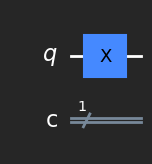

In [2]:
circuit = QuantumCircuit(1, 1)
circuit.x(0) # X-gate applied on qubit 0

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [3]:
print(statevector) # Essentially the output of our circuit

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


We can represent our statevector $\langle 0,1\rangle$ in the form of a Bloch sphere:

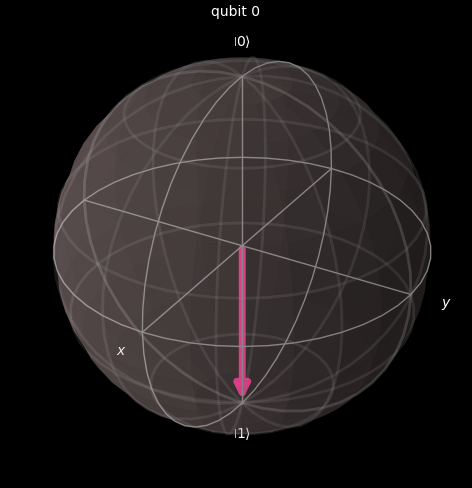

In [4]:
plot_bloch_multivector(statevector) 

Quantum operations are generally represented as either matrices, or **rotations** on the Bloch sphere. The Pauli-X gate is represented as a rotation of $\pi$ radians around the x-axis of the Bloch sphere. In other words, it's just a reorientation of the vector from $\ket{0}$ to $\ket{1}$ and vice versa.

# Measurement and Collapse:

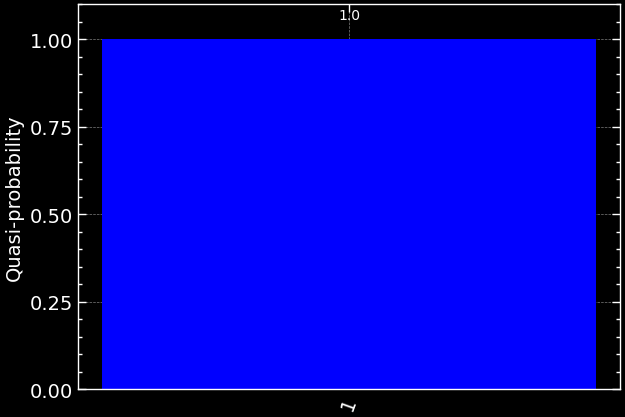

In [5]:
circuit.measure([0], [0]) # Measures the qubit and store the result in the classical bit
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = backend, shots = 1024).result().get_counts()

plot_distribution(counts, color = 'blue') 

Upon measurement of the system, the superposition **collapses** to a single state, either $\ket{0}$ or $\ket{1}$, with mathematically **equal** probabilities.

# Circuits as Matrices:

In [6]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

simulator = Aer.get_backend('unitary_simulator')
unitary = execute(circuit, backend = simulator).result().get_unitary()

print(unitary) # Essentially the output of our circuit

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


This matrix $$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$ is exactly the X-gate. In general, Quantum Gates as matrices have complex elements, so $Q_{ij}\in\mathbb C\equiv\Re(Q_{ij})+\Im(Q_{ij})$ for any Quantum Gate $Q$.

# The Hadamard Gate:

The Hadamard gate is represented by the matrix $$H=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$ so $H\ket{0}=\dfrac{1}{\sqrt{2}}(\ket{0}+\ket{1})$ and $H\ket{1}=\dfrac{1}{\sqrt{2}}(\ket{0}-\ket{1})$. The Hadamard gate is represented as a rotation of $\pi$ radians around the y-axis of the Bloch sphere.

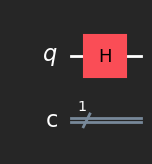

In [7]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [8]:
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


This statevector is the superposition of $\ket{0}$ and $\ket{1}$, and is represented as $\ket{+}=\dfrac{1}{\sqrt{2}}(\ket{0}+\ket{1})$, called the *Plus State.* Similarly, the state $$\ket{-}=\dfrac 1{\sqrt{2}}(\ket{0}-\ket{1})$$ is called the *Minus State,* obtained by applying the Hadamard gate to $\ket{1}$, which we'll analyze later.

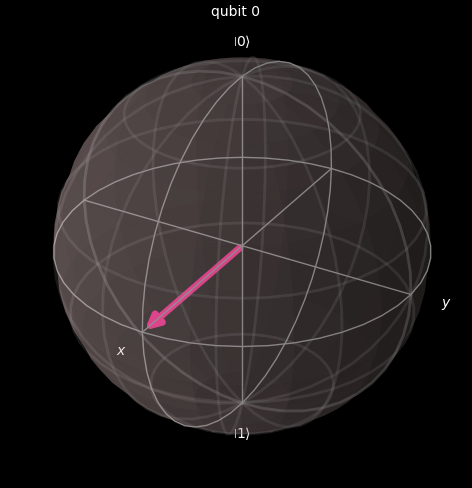

In [9]:
plot_bloch_multivector(statevector) 

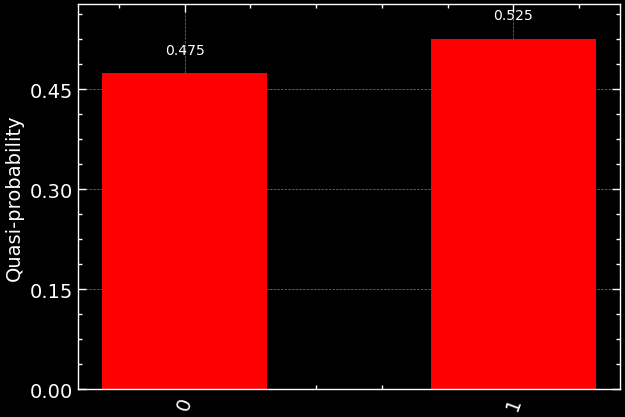

In [10]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = backend, shots = 1024).result().get_counts()

plot_distribution(counts, color = 'red') 

As evident, the distribution tells us that upon measurement, this collapses to either $\ket{0}$ or $\ket{1}$, with equal probabilities. The Minus State is obtained by applying first the X gate $(\ket{0}$\to\ket{1})$, and then the Hadamard Gate, so $H\ket{1}=\ket{-}$:

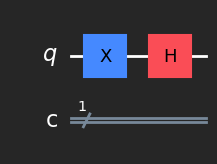

In [11]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [12]:
print(statevector)

Statevector([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j],
            dims=(2,))


Which we can see, is $\ket{-}$.

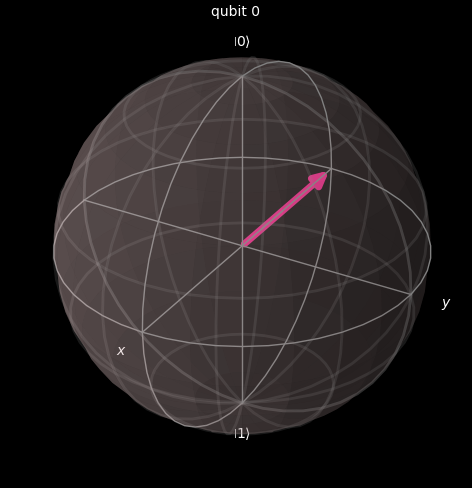

In [13]:
plot_bloch_multivector(statevector)

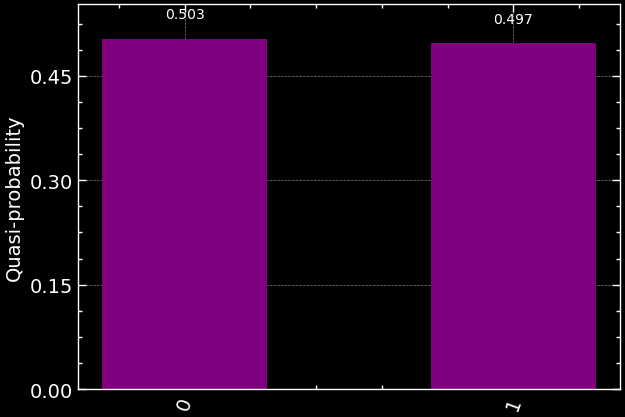

In [14]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = backend, shots = 1024).result().get_counts()

plot_distribution(counts, color = 'purple') 

The distribution tells us that upon measurement, this **also** collapses to either $\ket{0}$ or $\ket{1}$, with equal probabilities.

# The Pauli-Z Gate:

The Pauli-Z Gate, or simply the Z-Gate, is represented by $$\sigma_Z=\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$ so $\sigma_Z\ket{0}=\ket{0}$ and $\sigma_Z\ket{1}=-\ket{1}$. It's represented as a rotation of $\pi$ radians around the z-axis of the Bloch sphere. In other words, it only changes the **sign** of the qubit, so $\ket{0}$ isn't affected. 

To demonstrate this, we'll apply the Z-Gate to the Plus State, $\ket{+}$, and the Minus State, $\ket{-}$:

## Part-1: The Plus State:

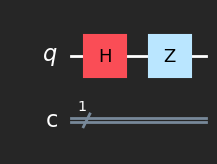

In [15]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.z(0)

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [16]:
print(statevector)

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


This is the *Minus State* $$\ket{-}=\dfrac 1{\sqrt{2}}(\ket{0}-\ket{1})$$

Hence, we have proved a key property $\sigma_Z\ket{+}=\ket{-}$.

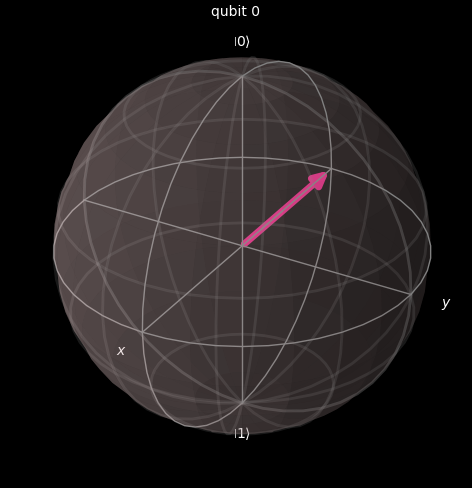

In [17]:
plot_bloch_multivector(statevector)

## Part-2: The Minus State:

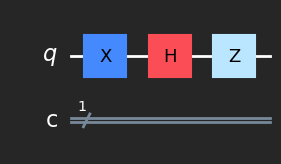

In [18]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
circuit.z(0)

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [19]:
print(statevector)

Statevector([0.70710678-8.65956056e-17j, 0.70710678-8.65956056e-17j],
            dims=(2,))


This is the Plus State $$\ket{+}=\dfrac 1{\sqrt{2}}(\ket{0}+\ket{1})$$

Hence, we have proved another key property $\sigma_Z\ket{-}=\ket{+}$.

## Distributions:

The distributions would be *equivalent*, since the Z-Gate only changes the sign of the qubit, and the sign doesn't affect the probability of the qubit collapsing to either $\ket{0}$ or $\ket{1}$:

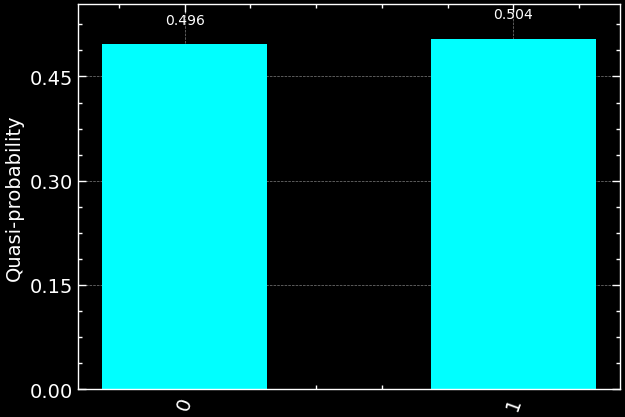

In [20]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = backend, shots = 1024).result().get_counts()

plot_distribution(counts, color = 'cyan') 

# The CNOT Gate:

Our **first 2-qubit Gate,** the CNOT Gate, is represented by the pretty hefty matrix $$\mathrm{CNOT}=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$$ but carries out the relatively simple operation of flipping the second (target) qubit if the first (control) qubit is $\ket{1}$, and leaving it unchanged if the first qubit is $\ket{0}$. This is represented as $\ket{a,b}\to\ket{a,a\oplus b}$, where $\oplus$ is the XOR operation. This is easier to understand in the form of a circuit:

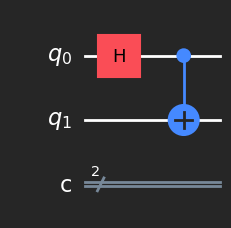

In [21]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1) # CNOT gate applied from control qubit 0 to target 1

simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend = simulator).result().get_statevector()
circuit.draw(output = 'mpl', style = 'iqx-dark')

In [22]:
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


The operations yield the statevector $$\ket{+}\otimes\ket{0}\equiv\dfrac 1{\sqrt{2}}(\ket{1}+\ket{0})\otimes\ket{0}$$ where $\otimes$ is the *Kronecker Product*, represented as $$\begin{bmatrix}a\\b\end{bmatrix}\otimes\begin{bmatrix}c\\d\end{bmatrix}=\begin{bmatrix}ac\\ad\\bc\\bd\end{bmatrix}$$

Now since the control qubits are $\ket{1}$ and $\ket{0}$ respectively, the target qubit is flipped to $\ket{1}$ in the first case, and left unchanged as $\ket{0}$ in the second case, yielding $$\dfrac 1{\sqrt{2}}(\ket{11}+\ket{00})$$ which is the superposition of the states $\ket{11}$ and $\ket{00}$.

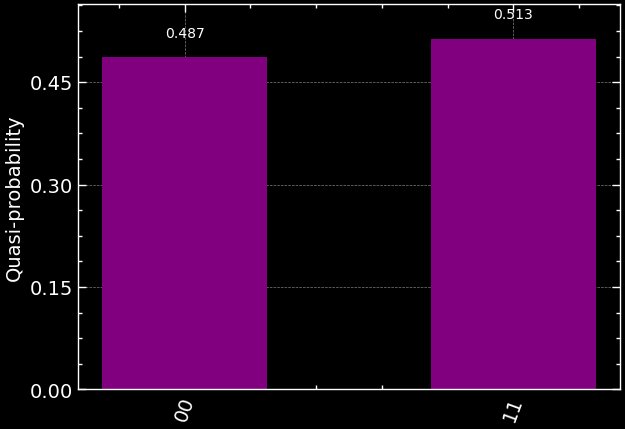

In [23]:
circuit.measure([0, 1], [0, 1])
backend = Aer.get_backend('qasm_simulator')
counts = execute(circuit, backend = backend, shots = 1024).result().get_counts()

plot_distribution(counts, color = 'purple') 

Therefore, there's a 50-50 chance that both qubits are $\ket{0}$ or $\ket{1}$, and a 0% chance that one is $\ket{0}$ and the other is $\ket{1}$.